**Description of the Focus Segment: **

Real estate investment has become an increasingly popular avenue for generating wealth and securing financial futures. However, navigating the complexities of the real estate market can be daunting for both novice and experienced investors. Factors such as property valuation, market trends, rental yields, and financing options play crucial roles in making informed investment decisions. A comprehensive real estate investment tool can simplify this process, providing users with the insights and resources they need to make smart investment choices.






**Areas of Impact: **

A well-designed real estate investment tool can enhance financial literacy and empower users to engage confidently in property investment. By offering data-driven insights, users can identify lucrative opportunities, mitigate risks, and maximize returns. This focus area emphasizes the importance of accessibility to market data and analytical tools for a broader audience, including first-time investors.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
import plotly.express as px
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support as score, roc_curve
from sklearn.utils import compute_sample_weight
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/tushuli396/Real-estate-investment/refs/heads/main/data/Real-estate.csv")

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

Existing Features:
  1. Transaction Date - Helps in understanding trends in house prices over time. Prices may vary depending on economic conditions, seasonal patterns, or market demand during specific periods.
  2. House Age - Newer houses may have higher prices, older houses may be less expensive, due to changes in standards and atchitecture trends over time.
  3. Distance to the nearest MRT station - Properties near to public transportation hubs are typically more expensive.
  4. Number of convience stores - A higher number of nearby convenience stores can indicate a more developed or urban area.
  5. Latitude, Longitude - Helps in visualize or map the property's location or spatial analysis and proximity to key urban infrastructures.
  7. House price of unit area - This is the target variable, price per unit area. Measure

In [24]:
pip install geopy wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.1-py3-none-any.whl size=14347 sha256=8a99be217bfacc73368ca91229424a6a6859fc42f2f02c86633fdac75276660d
  Stored in directory: /root/.cache/pip/wheels/4c/96/18/b9201cc3e8b47b02b510460210cfd832ccf10c0c4dd0522962
Successfully built wikipedia-api


In [31]:
len(data)

414

In [35]:
from geopy.geocoders import Nominatim
import wikipediaapi
import numpy as np

import requests

def get_population_from_coordinates(latitude, longitude):
    # Step 1: Reverse geocoding to get location name
    geocoding_url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={latitude}&lon={longitude}"
    try:
        response = requests.get(geocoding_url)
        response.raise_for_status()  # Raises an HTTPError for bad responses
        location_data = response.json()
    except requests.exceptions.RequestException as e:
        return f"Error during geocoding request: {e}"
    except requests.exceptions.JSONDecodeError:
        return f"Error decoding geocoding response. Response text: {response.text[:100]}..."

    # Extract city or county name from the response
    city = location_data.get('address', {}).get('city')
    county = location_data.get('address', {}).get('county')
    location_name = city or county

    if not location_name:
        return "Unable to determine location from coordinates"

    # Step 2: Query a population database or API
    # This is still a placeholder - you'd need to replace this with a real population data source
    population_url = f"https://api.population.io/1.0/population/{location_name}"
    try:
        response = requests.get(population_url)
        response.raise_for_status()
        population_data = response.json()
        return population_data['total_population']
    except requests.exceptions.RequestException as e:
        return f"Error during population data request: {e}"
    except requests.exceptions.JSONDecodeError:
        return f"Error decoding population data response. Response text: {response.text[:100]}..."
    except KeyError:
        return f"Population data not found in the response. Response: {population_data}"


populations = []
for index, row in data.iterrows():
    latitude = row['X5 latitude']
    longitude = row['X6 longitude']

    population = get_population_from_coordinates(latitude, longitude)

    # Append the population to the list
    populations.append(population)

# Add the population data as a new column to the DataFrame
data['Population'] = populations
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,day_of_year,time_of_day,Population
X1 transaction timestamp,,,,,,,,,,,
1970-01-01 00:33:32.917,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1,0.55,Error during geocoding request: 403 Client Err...
1970-01-01 00:33:32.917,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1,0.55,Error during geocoding request: 403 Client Err...
1970-01-01 00:33:33.583,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1,0.55,Error during geocoding request: 403 Client Err...
1970-01-01 00:33:33.500,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1,0.55,Error during geocoding request: 403 Client Err...
1970-01-01 00:33:32.833,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1,0.55,Error during geocoding request: 403 Client Err...
...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:33:33.000,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,1,0.55,Error during geocoding request: 403 Client Err...
1970-01-01 00:33:32.667,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,1,0.55,Error during geocoding request: 403 Client Err...
1970-01-01 00:33:33.250,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,1,0.55,Error during geocoding request: 403 Client Err...


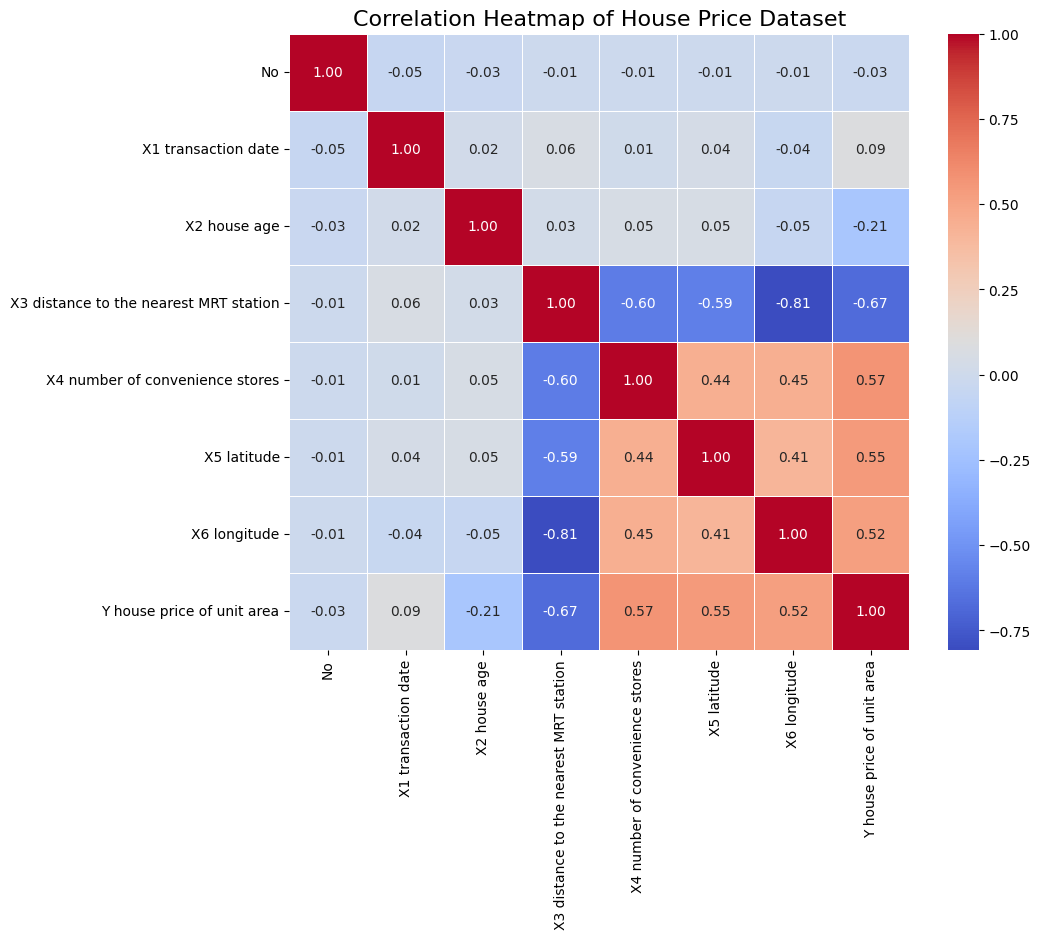

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of House Price Dataset', fontsize=16)
plt.show()

Correlation:
  1. Transaction Date vs House price of unit area: 0.09
  ```
  Weak positive correlation, indicating that more recent transaction dates slightly tend to have higher house prces, but the relationsship is not strong.
  ```
  2. House Age vs House price of unit area: -0.21
  ```
  Negative correlation suggests that older houses tend to have lower unit area prices.
  ```   
  3. Distance to the nearest MRT Station
  4. Number of convenience stores
  5. Latitude + Longtitude has some relation with MRT Station and Convience stores.



1. Examine Housing Trends
2. Assess Proximity Impact
3. Investment Property Finder
4. Geospatial Analysis
5. Predicting Valuation of the property based using Machine Learning models


Starting Saurav Code

In [6]:
df=pd.DataFrame()

df = data
df['X1 transaction timestamp'] = pd.to_datetime(df['X1 transaction date'], unit='s')


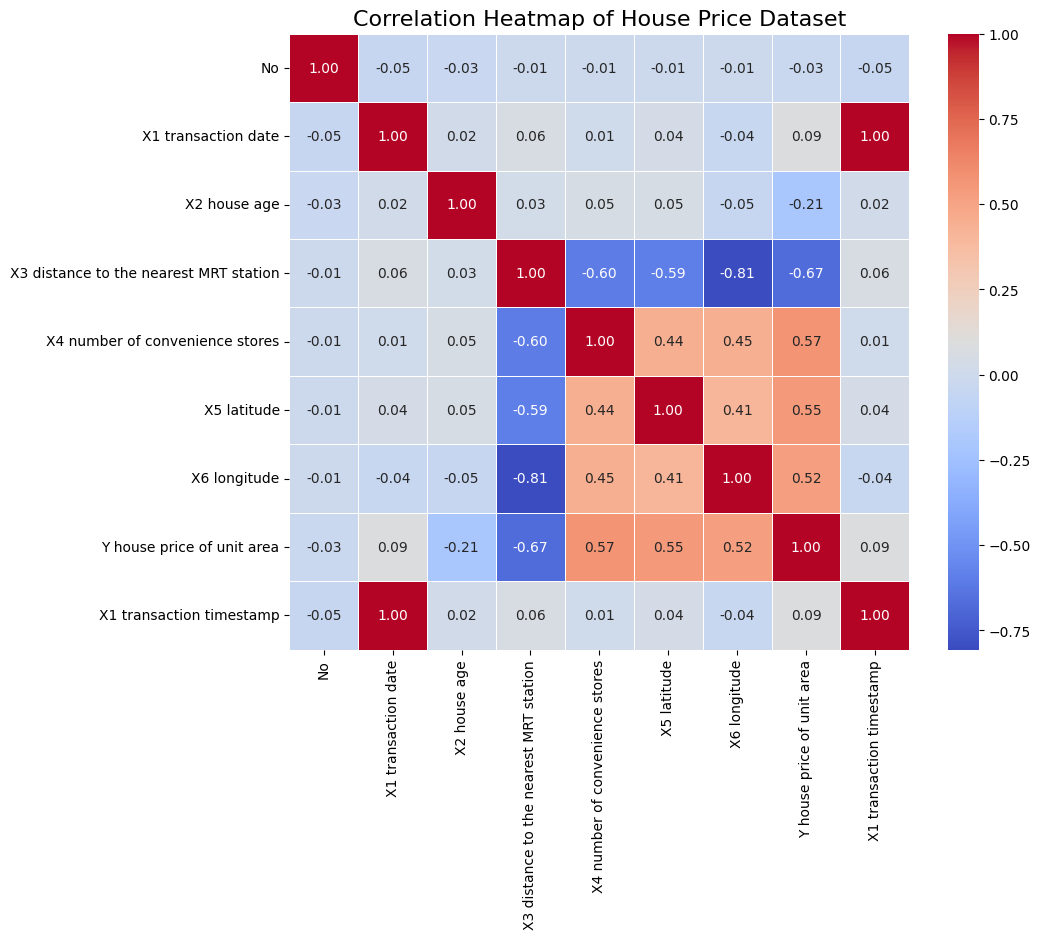

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of House Price Dataset', fontsize=16)
plt.show()

In [8]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 transaction timestamp
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1970-01-01 00:33:32.917
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1970-01-01 00:33:32.917
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1970-01-01 00:33:33.583
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1970-01-01 00:33:33.500
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1970-01-01 00:33:32.833
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,1970-01-01 00:33:33.000
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,1970-01-01 00:33:32.667
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,1970-01-01 00:33:33.250
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,1970-01-01 00:33:33.000


In [9]:
df.set_index('X1 transaction timestamp', inplace=True)

In [10]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

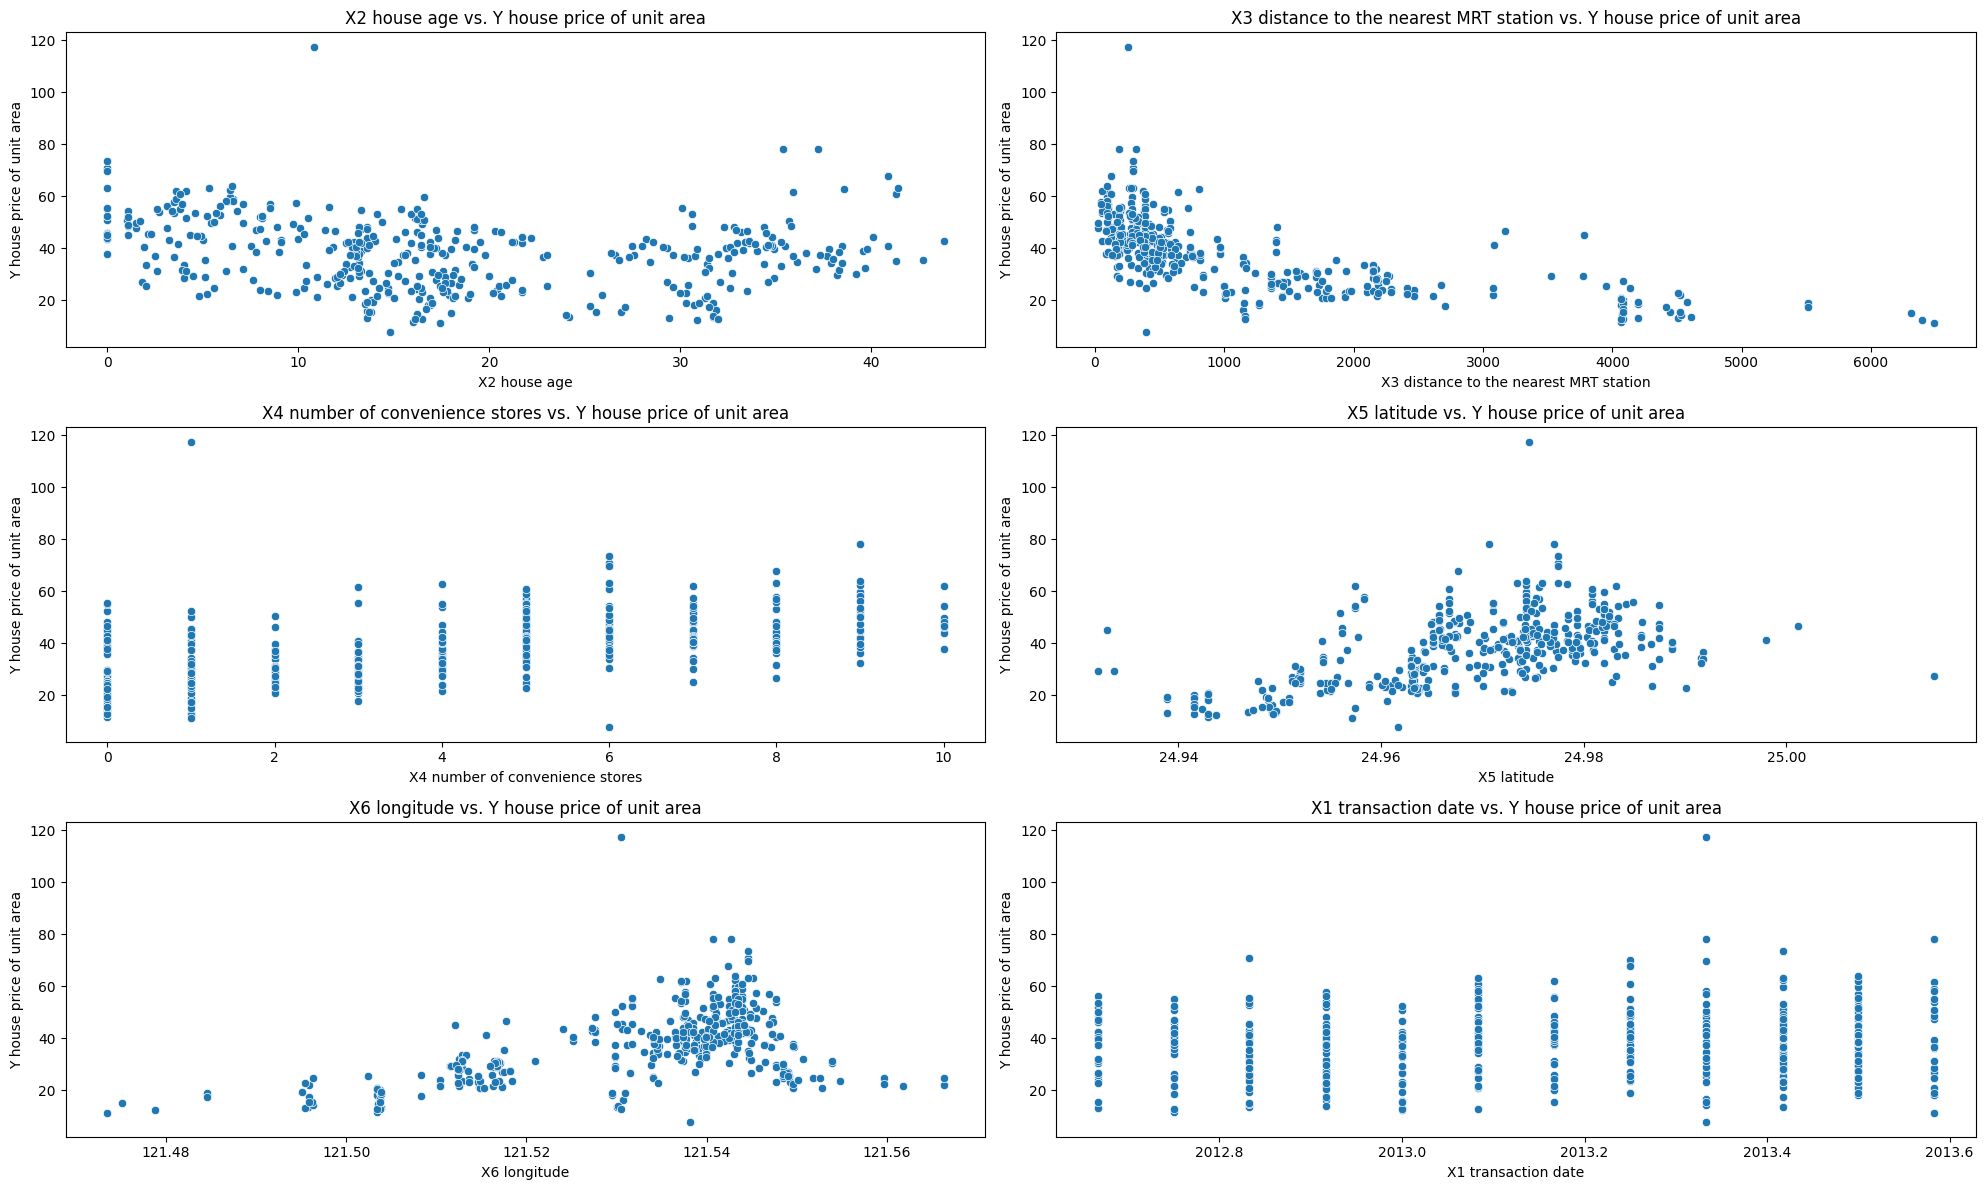

In [11]:
# Scatter plots for each feature vs. price
features_to_plot = [
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude',
    'X6 longitude',
    'X1 transaction date'
]

plt.figure(figsize=(20, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=feature, y='Y house price of unit area', data=df)
    plt.title(f'{feature} vs. Y house price of unit area')
plt.tight_layout()
plt.show()



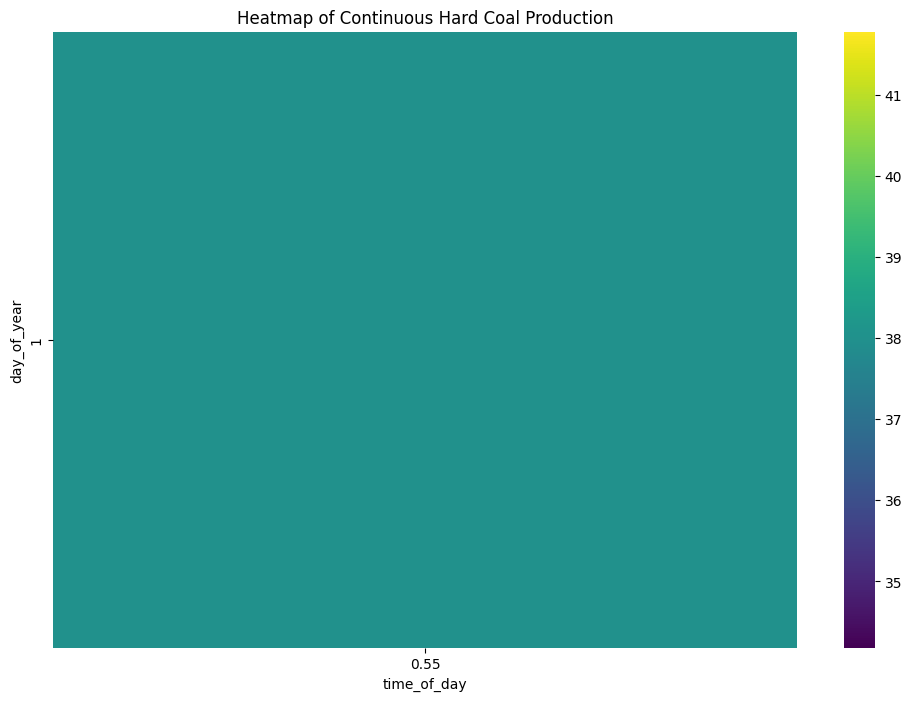

In [12]:
# Add day_of_year and time_of_day columns
df['day_of_year'] = df.index.dayofyear
df['time_of_day'] = df.index.hour + df.index.minute / 60

# Heatmap of continuous target variable over time
heatmap_data_cont = df.pivot_table(index='day_of_year', columns='time_of_day', values='Y house price of unit area')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_cont, cmap='viridis')
plt.title('Heatmap of Continuous Hard Coal Production')
plt.show()


In [13]:
# Select features and target variable
features = df.drop(columns=[
    'No',
    'day_of_year',
    'time_of_day',
    'Y house price of unit area'
])
target = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(decision_tree_regressor, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_scaled, y_train)

# Best parameters
best_params_dt = grid_search_dt.best_params_
print("Best parameters for Decision Tree Regressor:", best_params_dt)

# Evaluate the model on the test set
y_pred_dt = grid_search_dt.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse)

Best parameters for Decision Tree Regressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error: 64.19742572153862


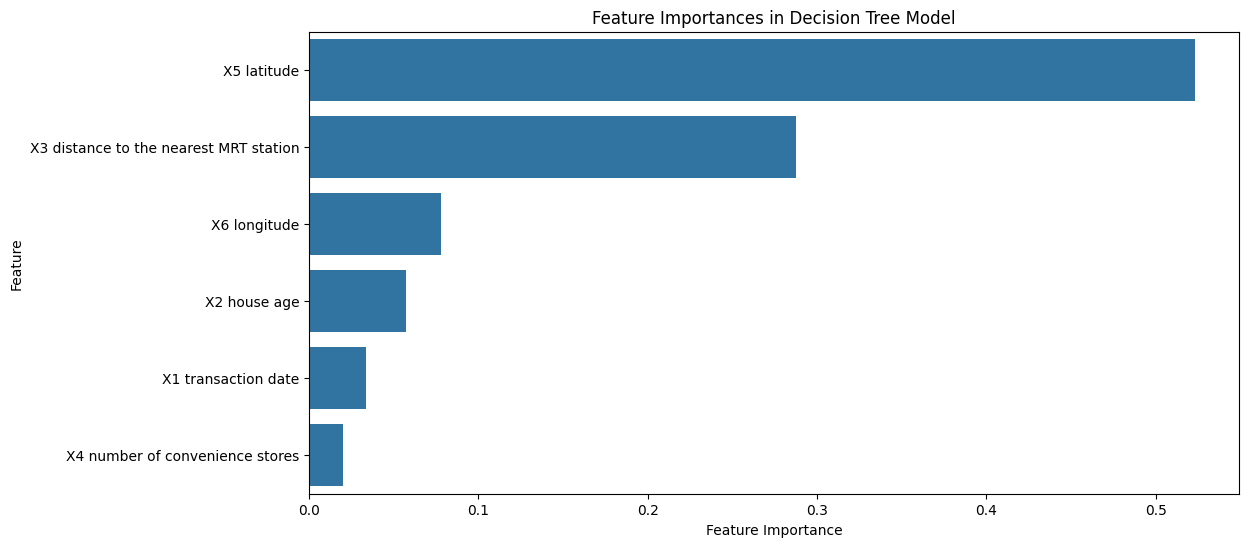

In [15]:
# Compute feature importances
# Get the best estimator
best_tree = grid_search_dt.best_estimator_

feature_importances = best_tree.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importances[sorted_indices],
    y=np.array(X_train.columns)[sorted_indices]
)
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


KNN

In [16]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'day_of_year', 'time_of_day'],
      dtype='object')

In [17]:
df.isna().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0
day_of_year,0
time_of_day,0


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the kNN regressor model
knn_regressor = KNeighborsRegressor()

# Define hyperparameters for tuning
param_grid_knn_regressor = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_knn_regressor = GridSearchCV(knn_regressor, param_grid_knn_regressor, cv=5, scoring='neg_mean_squared_error')
grid_search_knn_regressor.fit(X_train_scaled, y_train)

# Best parameters
best_params_knn_regressor = grid_search_knn_regressor.best_params_
print("Best parameters for kNN Regressor:", best_params_knn_regressor)

# Evaluate the model on the test set
y_pred_knn_regressor = grid_search_knn_regressor.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn_regressor))


Best parameters for kNN Regressor: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Mean Squared Error: 54.687214725224905


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid_rf_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf_reg = GridSearchCV(rf_regressor, param_grid_rf_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_rf_reg.fit(X_train_scaled, y_train)

# Best parameters
best_params_rf_reg = grid_search_rf_reg.best_params_
print("Best parameters for Random Forest Regressor:", best_params_rf_reg)

# Evaluate the model on the test set
y_pred_rf_reg = grid_search_rf_reg.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf_reg))


Best parameters for Random Forest Regressor: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 42.32135268453588


In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

base_regressor = DecisionTreeRegressor()

bagging_regressor = BaggingRegressor(estimator=base_regressor, n_estimators=100, random_state=42)

param_grid_bagging_reg = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_bagging_reg = GridSearchCV(bagging_regressor, param_grid_bagging_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_bagging_reg.fit(X_train_scaled, y_train)

# Best parameters
best_params_bagging_reg = grid_search_bagging_reg.best_params_
print("Best parameters for Bagging Regressor:", best_params_bagging_reg)

# Evaluate the model on the test set
y_pred_bagging_reg = grid_search_bagging_reg.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bagging_reg))


Best parameters for Bagging Regressor: {'bootstrap': True, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}
Mean Squared Error: 41.17998616433284


In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the SVR model
svm_regressor = SVR()

# Define hyperparameters for tuning
param_grid_svr = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Type of kernel
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_svr = GridSearchCV(svm_regressor, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

# Best parameters
best_params_svr = grid_search_svr.best_params_
print("Best parameters for SVR:", best_params_svr)

# Evaluate the model on the test set
y_pred_svr = grid_search_svr.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))


Best parameters for SVR: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error: 45.29747717571566


In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_regressor, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best parameters for XGBoost Regressor:", best_params_xgb)

# Evaluate the model on the test set
y_pred_xgb = grid_search_xgb.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", mse)

Best parameters for XGBoost Regressor: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9}
Mean Squared Error: 45.98047033899916


Conclusion: bagging is the best model for our dataset